<a href="https://colab.research.google.com/github/sayanarajasekhar/PyTorch/blob/main/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

Importing libraries

In [1]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Creating device agonistic code

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.

* For consistency, the dataset should have `1000` samples and a `random_state`=42.
* Turn the data into PyTorch tensors. Split the data into training and test sets using `train_test_split` with `80%` training and `20%` testing.


### 1. Create and split train test data

In [3]:
# Import make_moons from sklearn
from sklearn.datasets import make_moons

# Create 1000 samples
n_samples = 1000

X, y = make_moons(n_samples = n_samples,
                  noise = 0.03,
                  random_state = 42)

print(len(X), len(y))

# Splitting train test data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

1000 1000
800 200 800 200


In [4]:
X_train[0], y_train[0]

(array([1.97580347, 0.20764306]), np.int64(1))

### 2. Plot and visualize data using matplotlib

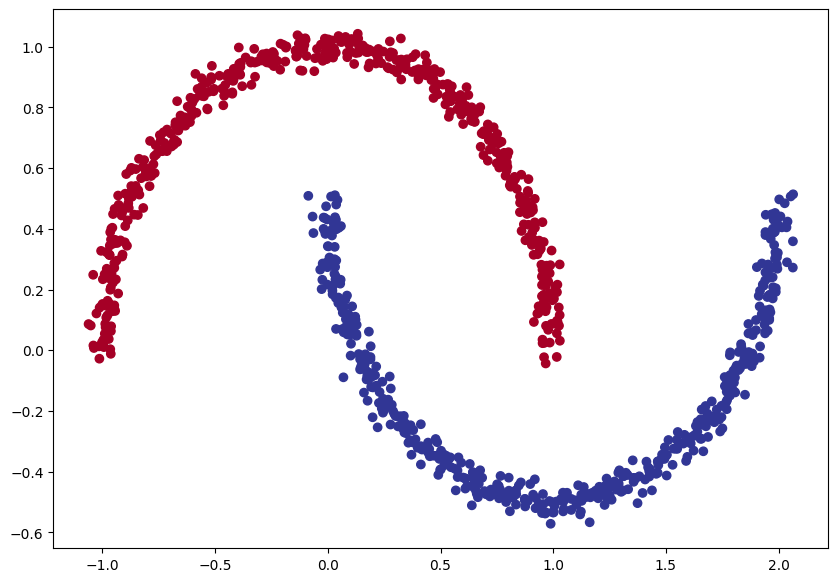

In [5]:
plt.figure(figsize = (10, 7))
plt.scatter(x = X[:,0],
            y = X[:,1],
            c = y,
            cmap = plt.cm.RdYlBu)

### 3. Convert the data to tensors

In [6]:
X_train = torch.from_numpy(X_train).type(torch.float).to(device)
y_train = torch.from_numpy(y_train).type(torch.float).to(device)
X_test = torch.from_numpy(X_test).type(torch.float).to(device)
y_test = torch.from_numpy(y_test).type(torch.float).to(device)

X_train.type, X_train.dtype, y_test.dtype

(<function Tensor.type>, torch.float32, torch.float32)

### 4. Create binary classification model

In [7]:
class MakeMoons(nn.Module):
  def __init__(self):
    super().__init__()
    self.linearLayers = nn.Sequential(
        nn.Linear(in_features = 2, out_features = 10),
        nn.ReLU(),
        nn.Linear(in_features = 10, out_features = 10),
        nn.ReLU(),
        nn.Linear(in_features = 10, out_features = 1)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linearLayers(x)

In [8]:
torch.manual_seed(42)
model_0 = MakeMoons()
model_0

MakeMoons(
  (linearLayers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

### 5. Create loss function and optimizer

In [9]:
# Loss Function
loss_fn = nn.BCEWithLogitsLoss()

# Optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

### 6. Train model

In [10]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [11]:
epochs = 1000

for epoch in range(epochs):
  ### Train
  model_0.train()

  # 1. Forward pass
  train_logits = model_0(X_train).squeeze()
  train_preds = torch.sigmoid(train_logits).round()

  # 2. Calculate loss
  train_loss = loss_fn(train_logits, y_train)
  train_acc = accuracy_fn(y_true = y_train,
                          y_pred = train_preds)

  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. loss backward
  train_loss.backward()

  # 5. Optimize step
  optimizer.step()

  ### Test
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.sigmoid(test_logits).round()

    # 2. Calculate loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f} Acc: {test_acc:.2f}%")


Epoch: 0 | Train Loss: 0.69537 Acc: 37.75% | Test Loss: 0.69457 Acc: 49.50%
Epoch: 100 | Train Loss: 0.38636 Acc: 81.88% | Test Loss: 0.40196 Acc: 77.00%
Epoch: 200 | Train Loss: 0.23664 Acc: 88.62% | Test Loss: 0.23758 Acc: 90.00%
Epoch: 300 | Train Loss: 0.19082 Acc: 91.38% | Test Loss: 0.18528 Acc: 92.50%
Epoch: 400 | Train Loss: 0.15147 Acc: 93.75% | Test Loss: 0.14452 Acc: 94.00%
Epoch: 500 | Train Loss: 0.10692 Acc: 95.62% | Test Loss: 0.09974 Acc: 97.50%
Epoch: 600 | Train Loss: 0.06902 Acc: 98.50% | Test Loss: 0.06298 Acc: 99.00%
Epoch: 700 | Train Loss: 0.04417 Acc: 99.75% | Test Loss: 0.03936 Acc: 99.50%
Epoch: 800 | Train Loss: 0.03007 Acc: 100.00% | Test Loss: 0.02625 Acc: 100.00%
Epoch: 900 | Train Loss: 0.02188 Acc: 100.00% | Test Loss: 0.01887 Acc: 100.00%


### 7. Test model

In [12]:
model_0.eval
with torch.inference_mode():
  y_logits = model_0(X_test).squeeze()
  y_preds = torch.sigmoid(y_logits).round()

(y_preds == y_test)[:5]

tensor([True, True, True, True, True])

### 8. Visualize

In [13]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/sayanarajasekhar/PyTorch/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

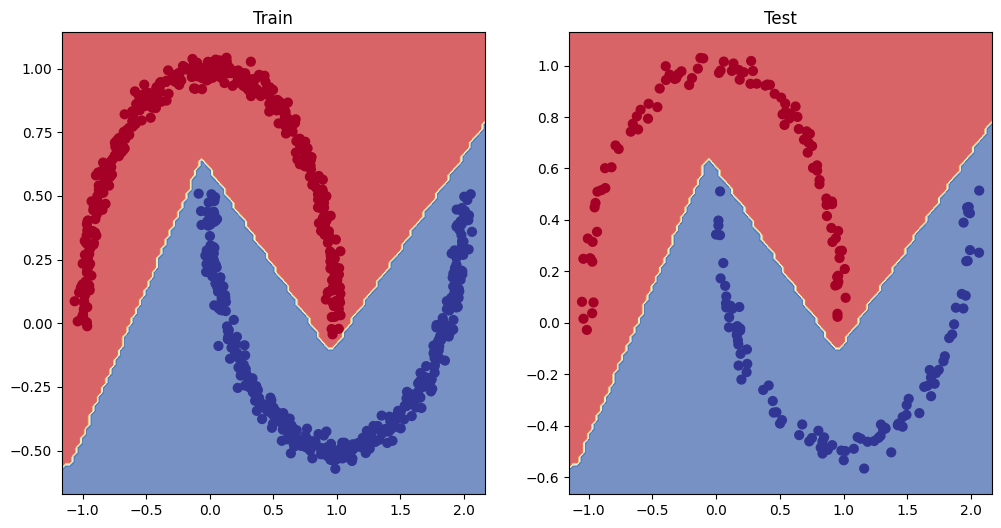

In [14]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 2. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/)

* Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
* Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
* Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
* Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

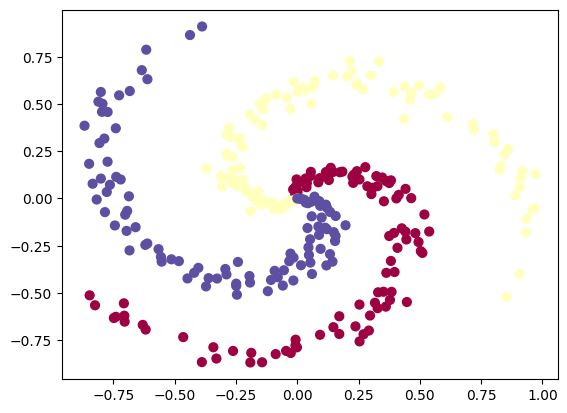

In [50]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [51]:
X.shape, y.shape, type(X), y.dtype

((300, 2), (300,), numpy.ndarray, dtype('uint8'))

In [52]:
X[:5], y[:5]

(array([[-0.00000000e+00,  0.00000000e+00],
        [-1.59486826e-03,  9.97430701e-03],
        [-8.63885148e-03,  1.82617596e-02],
        [ 8.82556602e-05,  3.03029018e-02],
        [ 8.22514433e-04,  4.03956675e-02]]),
 array([0, 0, 0, 0, 0], dtype=uint8))

### 2.1 Convert data to tesnors and split

In [53]:
X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.LongTensor).to(device)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [54]:
y.unique()

tensor([0, 1, 2])

### 2.2 Create model class

In [55]:
class SpiralModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Linear(in_features = 2, out_features = 8),
        nn.ReLU(),
        nn.Linear(in_features = 8, out_features = 8),
        nn.ReLU(),
        nn.Linear(in_features = 8, out_features = 3)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer(x)

### 2.3 Create a instance of model class

In [56]:
torch.manual_seed(42)
model_2 = SpiralModel()
model_2

SpiralModel(
  (layer): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=3, bias=True)
  )
)

### 2.4 Create a loss function and Optimizer

In [57]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.Adam(params = model_2.parameters(),
                             lr = 0.1)

### 2.5 Train and Test model

In [58]:
epochs = 1000

for epoch in range(epochs):

  ### Train
  model_2.train()

  # 1. Forward pass
  train_logits = model_2(X_train).squeeze()
  train_preds = torch.softmax(train_logits, dim = 1).argmax(dim = 1)

  # 2. Calculate loss / accuracy
  train_loss = loss_fn(train_logits, y_train)
  train_acc = accuracy_fn(y_true = y_train,
                          y_pred = train_preds)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  train_loss.backward()

  # 5. Optimize step
  optimizer.step()

  ### Test
  model_2.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_logits = model_2(X_test).squeeze()
    test_preds = torch.softmax(test_logits, dim = 1).argmax(dim = 1)

    # 2. Calculate loss /accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f} Acc: {test_acc:.2f}% |")


Epoch: 0 | Train Loss: 1.10323 Acc: 32.50% | Test Loss: 1.07714 Acc: 40.00% |
Epoch: 100 | Train Loss: 0.02199 Acc: 99.17% | Test Loss: 0.00367 Acc: 100.00% |
Epoch: 200 | Train Loss: 0.01688 Acc: 99.17% | Test Loss: 0.00059 Acc: 100.00% |
Epoch: 300 | Train Loss: 0.01551 Acc: 99.17% | Test Loss: 0.00015 Acc: 100.00% |
Epoch: 400 | Train Loss: 0.01518 Acc: 99.17% | Test Loss: 0.00022 Acc: 100.00% |
Epoch: 500 | Train Loss: 0.01468 Acc: 99.17% | Test Loss: 0.00009 Acc: 100.00% |
Epoch: 600 | Train Loss: 0.01410 Acc: 99.17% | Test Loss: 0.00006 Acc: 100.00% |
Epoch: 700 | Train Loss: 0.01408 Acc: 99.17% | Test Loss: 0.00006 Acc: 100.00% |
Epoch: 800 | Train Loss: 0.01421 Acc: 99.17% | Test Loss: 0.00004 Acc: 100.00% |
Epoch: 900 | Train Loss: 0.01421 Acc: 99.17% | Test Loss: 0.00003 Acc: 100.00% |


### 2.6 Test and Visualize

In [59]:
model_2.eval()
with torch.inference_mode():
  y_logits = model_2(X_test).squeeze()
  y_preds = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

y_preds == y_test

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True])

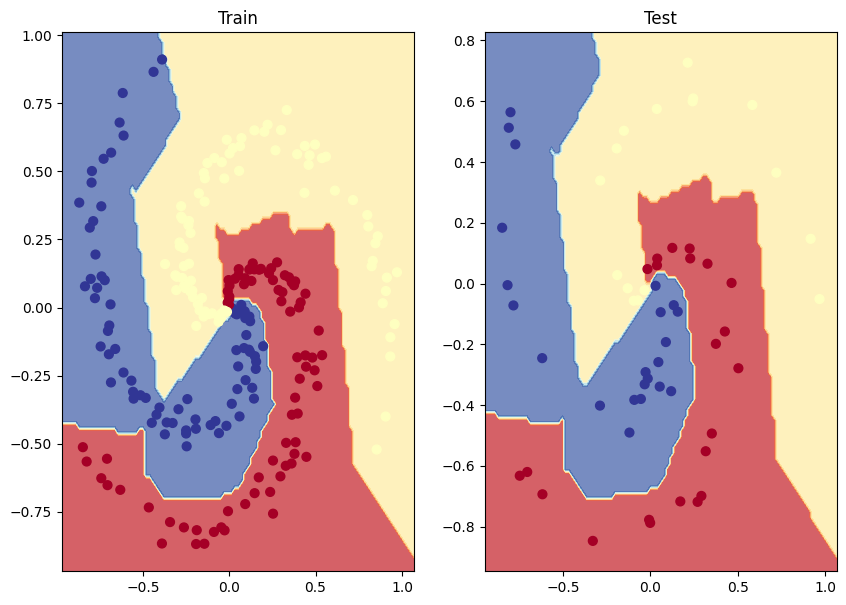

In [60]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2,
                       X_train,
                       y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2,
                       X_test,
                       y_test)